In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/DailyDelhiClimateTrain.csv')

<Axes: xlabel='date', ylabel='meantemp'>

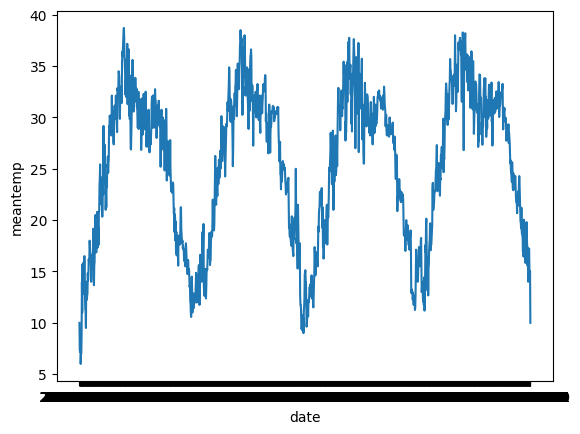

In [ ]:
sns.lineplot(x='date',y='meantemp',data=df)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

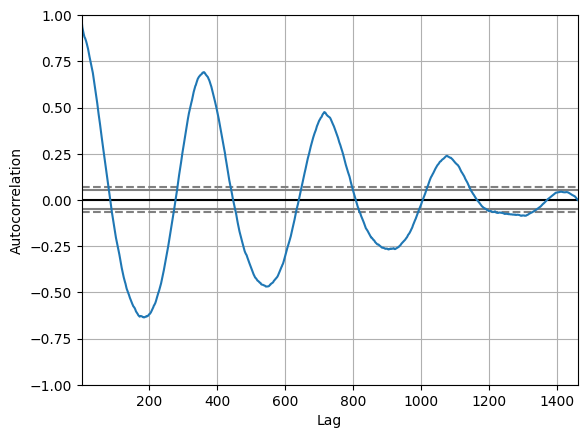

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['meantemp'])

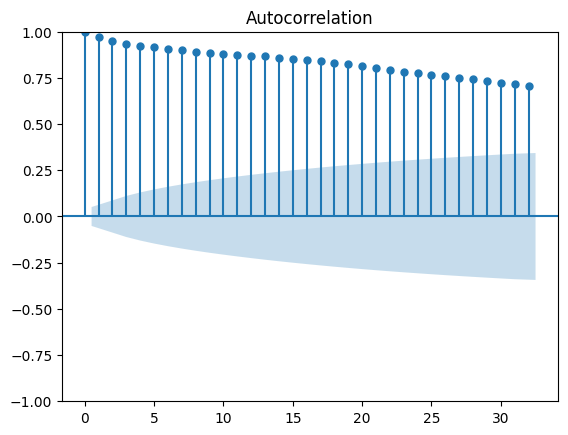

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['meantemp'])
plt.show()

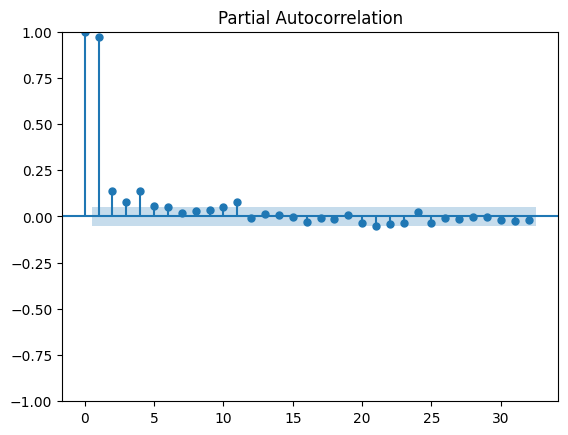

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['meantemp'])
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose



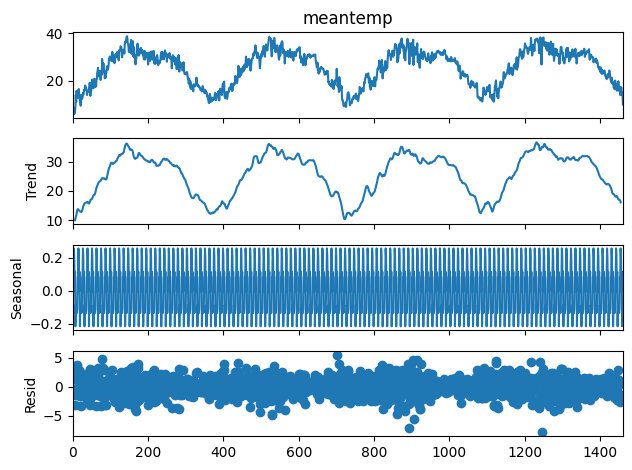

In [ ]:
decomposition=seasonal_decompose(df['meantemp'],model='additive',period=12)
decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df.meantemp, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.0210690559206737
2. P-Value :  0.2774121372301601
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1451
5. Critical Values :
	 1% :  -3.4348647527922824
	 5% :  -2.863533960720434
	 10% :  -2.567831568508802


In [ ]:
pip install pmdarima

In [ ]:
import pmdarima as pmd

model=pmd.auto_arima(df['meantemp'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=5543.944, Time=5.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5650.181, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5615.079, Time=0.70 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5602.960, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5648.181, Time=0.06 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=5544.946, Time=3.25 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=5544.887, Time=3.10 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=5545.718, Time=34.69 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=5545.695, Time=25.35 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5544.460, Time=0.84 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5546.490, Time=8.93 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=5546.296, Time=4.73 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=5547.925, Time=13.91 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5604.958, Time=1.11 sec
 ARIMA(1,1,0)(1,

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
sarima=SARIMAX(df['meantemp'],order=(1,1,1),seasonal_order=(1,0,1,12))
predicted=sarima.fit().predict();predicted

,predicted_mean
0,0.000000
1,9.999995
2,7.841684
3,7.555284
4,8.665322
...,...
1457,16.702556
1458,17.159179
1459,15.521542
1460,14.752933


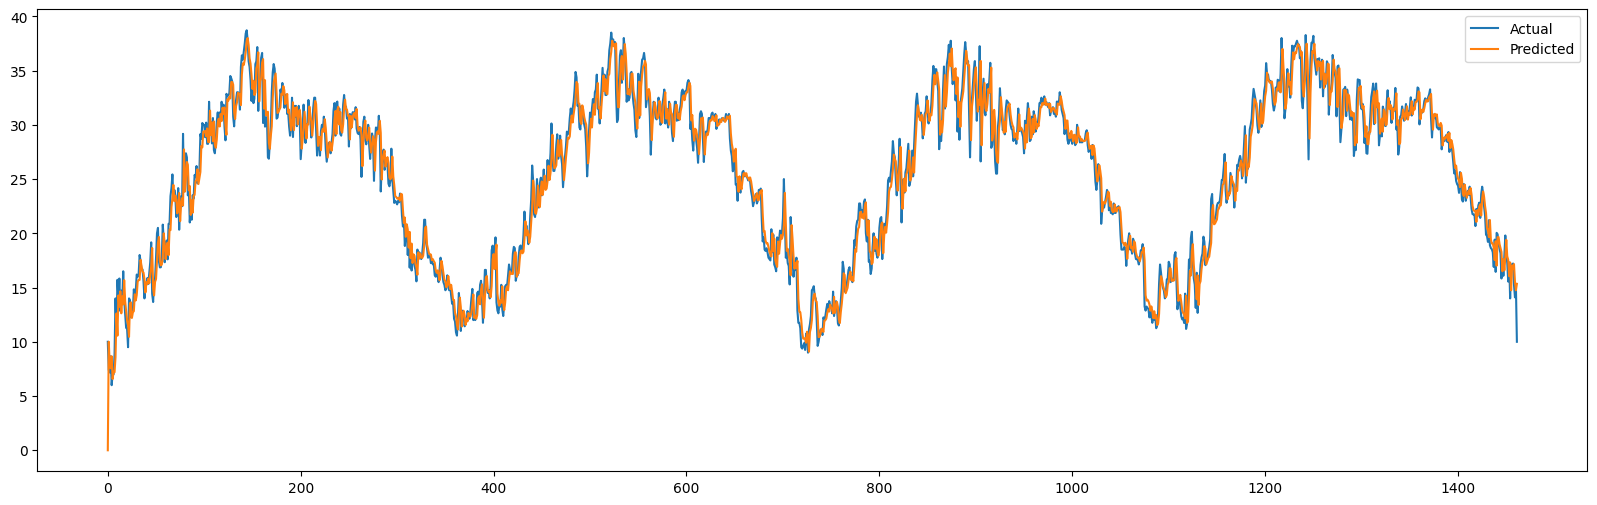

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df['meantemp'],label='Actual')
plt.plot(predicted,label='Predicted')
plt.legend()